## 라이브러리 로드

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [5]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [6]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [7]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int32         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(2), object(1)
memory usage: 30.8+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [9]:
# 전체 평균 판매금액
overall_mean = df['TotalPrice'].mean().round(2)
overall_mean

20.12

In [10]:
# 국가 별 평균 판매금액
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
country_mean = df[df['Country'].isin(country_group)].groupby('Country')['TotalPrice'].mean()
country_mean

Country
Canada        24.280662
Hong Kong     55.252817
Japan        116.561900
Lebanon       37.641778
Singapore     95.852658
USA           20.002179
Name: TotalPrice, dtype: float64

In [11]:
# 국가 별 평균 판매금액 데이터 프레임 생성
country_sales = df[df['Country'].isin(country_group)].groupby('Country')['TotalPrice'].mean().reset_index()

country_sales

,Country,TotalPrice
0,Canada,24.280662
1,Hong Kong,55.252817
2,Japan,116.561900
3,Lebanon,37.641778
4,Singapore,95.852658
5,USA,20.002179


C:\Users\pc\AppData\Local\Temp\ipykernel_20544\3244336538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = country_sales, x = 'Country', y = 'TotalPrice', palette = 'Set3');


Text(0, 0.5, '판매량 평균')

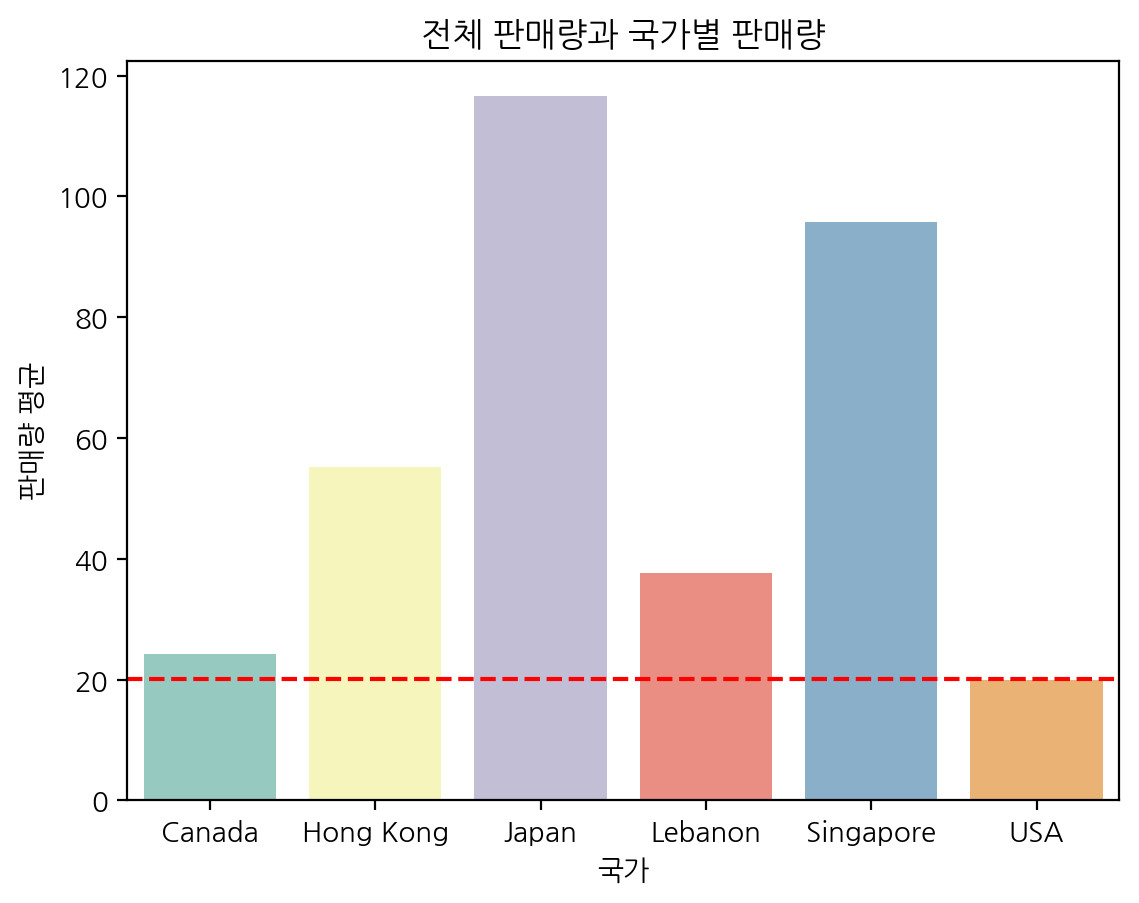

In [12]:
# 시각화
sns.barplot(data = country_sales, x = 'Country', y = 'TotalPrice', palette = 'Set3');
plt.axhline(overall_mean, color = 'red', linestyle = '--')
plt.title('전체 판매량과 국가별 판매량')
plt.xlabel('국가')
plt.ylabel('판매량 평균')

### [결과 해석]
- __심슨의 역설__: 대부분의 국가가 전체 평균 판매 금액보다 매우 높은 국가별 판매 금액을 나타냄.
- 전체 평균 판매금액과 미국, 캐나다의 평균 판매금액이 매우 비슷함, = 미국, 캐나다에 대한 판매 전략이 전체 전략과 일치함.
- 일본, 싱가폴의 평균 판매금액은 전체 평균 판매 금액을 훨씬 상회함. = 일본, 싱가폴 시장의 높은 판매 가치

## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.  
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.  
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [13]:
df.isna().mean()

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID      0.249423
Country         0.000000
InvoiceMonth    0.000000
TotalPrice      0.000000
dtype: float64

In [14]:
import statsmodels.api as sm
# 데이터 전처리: 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

X.shape, y.shape

((530104, 2), (530104,))

In [15]:
# 단순 회귀분석 수행
model = sm.OLS(y, X).fit()

# 결과 요약
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:27:02   Log-Likelihood:            -3.7156e+06
No. Observations:              530104   AIC:                         7.431e+06
Df Residuals:                  530102   BIC:                         7.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0802      0.370     43.463      0.000      15.355      16.805
UnitPrice      1.0343      0.010    100.999      0.000       1.014       1.054
================================================================================
Omnibus:                  3354156.595   Durbin-Watson:                     1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2111068902737906.750
Skew:                         520.634   Prob(JB):                           0.00
Kurtosis:                  309156.253   Cond. No.                           36.3
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### [결과 해석]
- 결정계수 (R-squared)가 0.019, 단가(UnitPrice)가 총 판매액(TotalPrice)의 변동성을 약 1.9%만 설명함.  
    = 즉, 단가와 총 판매액 사이에 강한 선형관계가 없음.
- UnitPrice의 기울기가 약 1.03(coef), 절편이 약 16.08(const).  
    = 기본단가가 약 16.08이며 단가가 한 단위씩 증가할 때 약 1.03만큼 증가함.
- p-value가 0.00 이므로 (P > |t|) 귀무 가설을 반박하며, 즉 단가가 총 판매액에 (매우 약하지만) 양의 영향을 미친다는 뜻.
- 즉, 총 판매액을 결정하는 데 있어 단가 외에 다른 요인들도 중요함.

## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [16]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasSeason"] = df_promotion["InvoiceDate"].dt.month == 12
# 외국에서는 크리스마스~신정 기간에는 영업을 하지 않는 경우가 많고, 기존 코드를 사용하면 실제로 0이 출력되기 때문에 코드를 수정했습니다.
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [17]:
df_promotion.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
count,26157.000000,26157,26157.000000,26157.000000,26157.0,26157.000000
mean,11.938105,2010-12-10 01:40:59.816492544,3.132454,15529.182617,12.0,21.895244
min,1.000000,2010-12-01 08:26:00,0.070000,12347.000000,12.0,0.140000
25%,2.000000,2010-12-05 13:05:00,1.250000,14161.000000,12.0,4.200000
50%,4.000000,2010-12-09 11:28:00,2.100000,15570.000000,12.0,10.500000
75%,12.000000,2010-12-14 13:31:00,3.750000,17179.000000,12.0,19.800000
max,2880.000000,2010-12-23 16:06:00,295.000000,18269.000000,12.0,3828.000000
std,45.941418,NaN,5.220482,1740.336670,0.0,76.642278


In [18]:
# 12월 총 판매액
sales_christmas_season = df_promotion[df_promotion["IsChristmasSeason"]]["TotalPrice"].sum()

In [19]:
# 12월 크리스마스 상품 판매액
sales_christmas_product = df_promotion[df_promotion["IsChristmasProduct"]]["TotalPrice"].sum()

In [20]:
# 크리스마스 관련 상품 판매 개수
df_promotion.groupby(["IsChristmasProduct"])["Quantity"].count().reset_index()

,IsChristmasProduct,Quantity
0,False,24556
1,True,1601


In [21]:
# 크리스마스 관련 상품 판매 백분율
christmas_product_sales_percentage = round((1601 / 26157 * 100), 2)

In [22]:
# 12월 상품별 평균 판매금액
avg_sales_by_period_and_product = df_promotion.groupby(["IsChristmasSeason", "IsChristmasProduct"])["TotalPrice"].mean().reset_index()

In [23]:
print("12월 총 판매액:", sales_christmas_season, "\n12월 크리스마스 상품 판매액:",sales_christmas_product,
      "\n12월 총 판매액에서 크리스마스 상품 판매액이 차지하는 비중:", (sales_christmas_product/sales_christmas_season *100).round(2), "%",
      "\n12월 총 판매량에서 크리스마스 상품 판매량이 차지하는 비중:", christmas_product_sales_percentage, "%")
avg_sales_by_period_and_product

12월 총 판매액: 572713.89 
12월 크리스마스 상품 판매액: 24268.13 
12월 총 판매액에서 크리스마스 상품 판매액이 차지하는 비중: 4.24 % 
12월 총 판매량에서 크리스마스 상품 판매량이 차지하는 비중: 6.12 %


,IsChristmasSeason,IsChristmasProduct,TotalPrice
0,True,False,22.334491
1,True,True,15.158107


### [결과 해석]
- 12월 동안 판매된 전체 상품 중 크리스마스 관련 상품이 차지하는 비중은 상대적으로 작지만, 이러한 상품들이 특정 소비자 그룹에게 매력적일 수 있음
- 크리스마스 관련 상품이 평균적으로 더 낮은 가격대를 가지고 있을 수 있음

이에 따라 위에서 제시되었던 비즈니스 전략을 수행할 수 있습니다.
* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.

## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [24]:
import statsmodels.formula.api as smf

In [25]:
# # 국가 원핫인코딩
# df_promotion = pd.get_dummies(df_promotion, columns=['Country'], drop_first=True)

# # 크리스마스 관련 상품 여부를 정수로 변환 (True=1, False=0)
# df_promotion['IsChristmasProduct'] = df_promotion['IsChristmasProduct'].astype(int)

# # 다변량 선형 회귀모델 구축
# formula = 'Quantity ~ IsChristmasProduct + UnitPrice + ' + ' + '.join(df_promotion.columns[df_promotion.columns.str.startswith('Country_')])
# model = smf.ols(formula=formula, data=df_promotion).fit()

#   File <unknown>:1
#     Country_Channel Islands
#                     ^
# SyntaxError: invalid syntax

# 에러 발생

In [26]:
df_promotion['Country'].value_counts()

Country
United Kingdom     23942
Germany              512
France               434
EIRE                 333
Norway               147
Portugal             116
Belgium               95
Cyprus                83
Spain                 75
Netherlands           72
Japan                 65
Switzerland           49
Italy                 40
Lithuania             35
Australia             32
Iceland               31
Sweden                26
Denmark               20
Channel Islands       17
Finland               17
Poland                 8
Austria                8
Name: count, dtype: int64

statsmodels의 ols 함수에서는 변수명에 공백이나 특수 문자가 포함될 수 없으나 현재 국가명이 United Kingdom, Channel Islands으로 공백을 포함하는 것들이 있음.

In [27]:
# 국가명을 포함하는 변수명의 공백을 밑줄로 대체
df_promotion['Country'] = df_promotion['Country'].str.replace(' ', '_').str.replace('-', '_')

# 국가 원핫인코딩
df_promotion = pd.get_dummies(df_promotion, columns=['Country'], drop_first=True)

# 크리스마스 관련 상품 여부를 정수로 변환 (True=1, False=0)
df_promotion['IsChristmasProduct'] = df_promotion['IsChristmasProduct'].astype(int)

# 다변량 선형 회귀모델 구축
formula = 'Quantity ~ IsChristmasProduct + UnitPrice + ' + ' + '.join(df_promotion.columns[df_promotion.columns.str.startswith('Country_')])
model = smf.ols(formula=formula, data=df_promotion).fit()

In [28]:
# 결과 요약
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     31.87
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          5.46e-138
Time:                        13:27:02   Log-Likelihood:            -1.3687e+05
No. Observations:               26157   AIC:                         2.738e+05
Df Residuals:                   26133   BIC:                         2.740e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          16.8705      8.016      2.104      0.035       1.158      32.583
Country_Austria[T.True]            -6.0392     17.920     -0.337      0.736     -41.163      29.084
Country_Belgium[T.True]             3.1887      9.265      0.344      0.731     -14.972      21.349
Country_Channel_Islands[T.True]    -6.9579     13.608     -0.511      0.609     -33.630      19.714
Country_Cyprus[T.True]             -4.4939      9.433     -0.476      0.634     -22.983      13.995
Country_Denmark[T.True]             8.3909     12.921      0.649      0.516     -16.935      33.717
Country_EIRE[T.True]                1.7074      8.390      0.204      0.839     -14.737      18.152
Country_Finland[T.True]            58.5934     13.605      4.307      0.000      31.927      85.260
Country_France[T.True]             -3.4033      8.304     -0.410      0.682     -19.679      12.872
Country_Germany[T.True]            -1.2925      8.260     -0.156      0.876     -17.482      14.898
Country_Iceland[T.True]            -4.9877     11.424     -0.437      0.662     -27.379      17.404
Country_Italy[T.True]              -6.6440     10.751     -0.618      0.537     -27.717      14.429
Country_Japan[T.True]              47.1576      9.790      4.817      0.000      27.969      66.346
Country_Lithuania[T.True]           3.3680     11.087      0.304      0.761     -18.364      25.100
Country_Netherlands[T.True]        78.9641      9.631      8.199      0.000      60.086      97.842
Country_Norway[T.True]              8.3921      8.844      0.949      0.343      -8.942      25.726
Country_Poland[T.True]              1.9375     17.919      0.108      0.914     -33.184      37.059
Country_Portugal[T.True]           -6.0620      9.051     -0.670      0.503     -23.803      11.679
Country_Spain[T.True]              -3.3852      9.572     -0.354      0.724     -22.147      15.376
Country_Sweden[T.True]            136.1033     11.969     11.371      0.000     112.643     159.564
Country_Switzerland[T.True]        -0.6570     10.303     -0.064      0.949     -20.852      19.538
Country_United_Kingdom[T.True]     -3.9356      8.019     -0.491      0.624     -19.653      11.782
IsChristmasProduct                 -0.7779      1.172     -0.664      0.507      -3.075       1.520
UnitPrice                          -0.5510      0.054    -10.226      0.000      -0.657      -0.445
==============================================================================
Omnibus:                    67557.031   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1893061778.356
Skew:                          29.601   Prob(JB):                         0.00
Kurtosis:                    1319.605   Cond. No.                  

### [결과 해석]
- __회귀계수 해석__
    - IsChristmasProduct
        - 크리스마스 관련 상품 여부의 계수 -0.7779.
        - 크리스마스 관련 상품이 비관련 상품에 비해 판매량이 적음.
            = 크리스마스 관련 상품이 특정 시즌에 집중되어 판매되는 경향이 있음
    - UnitPrice
        - 단가의 계수 -0.5510
        - 단가가 높아질수록 판매량이 감소
            = 고가의 상품이 상대적으로 적게 팔림
    - Country 계수
        - 해당 국가에서의 판매량이 기준 국가(여기서는 첫 번째 국가, drop_first=True 옵션으로 인해 제외된 국가)에 비해 어떻게 다른지를 나타냄
        - 핀란드, 일본, 네덜란드, 스웨덴에서의 판매량이 상당히 높음
        - 다른 국가들의 계수는 상대적으로 낮음 (크리스마스 상품 구매에 부정적일 수 있음)

- __비즈니스 전략__
    - 크리스마스 시즌 전략
        - 크리스마스 관련 상품이 비관련 상품보다 적게 팔리는 경향
            → 크리스마스 시즌 동안 특별 프로모션을 통해 이러한 상품의 판매를 촉진할 필요가 있음
            → 크리스마스 시즌을 앞두고 마케팅 캠페인을 강화하여 소비자의 관심을 끌고, 구매를 유도해야 함
    - 가격 전략
        - 단가가 판매량에 부정적인 영향을 미침
            → 가격 책정 전략을 신중히 고려해야 함
        - 가격 인하 프로모션 또는 다양한 가격대의 상품을 제공하여 소비자 선택의 폭을 넓힐 수 있음
    - 국가별 전략
        - 특정 국가에서의 높은 판매량을 고려하여, 이러한 시장에 대한 마케팅 및 프로모션 활동을 강화해야 함

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.
5) 로지스틱 회귀 모델 생성 및 학습합니다.
6) 모델을 평가 합니다.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 필요한 데이터만 필터링
df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]

# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

Target
False    6720
True     2028
Name: count, dtype: int64

In [30]:
# 특성과 타겟 변수 분리 (범주형 변수 처리)
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']

In [31]:
# 데이터 분할: 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# 로지스틱 회귀 모델 생성 및 학습
log_reg = LogisticRegression(max_iter=1000)  # 충분한 반복 횟수 설정
log_reg.fit(X_train, y_train)

# 모델 평가
predictions = log_reg.predict(X_test)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(report, conf_matrix)

              precision    recall  f1-score   support

       False       0.78      0.92      0.84      1353
        True       0.27      0.10      0.15       397

    accuracy                           0.73      1750
   macro avg       0.52      0.51      0.49      1750
weighted avg       0.66      0.73      0.68      1750
 [[1244  109]
 [ 357   40]]


In [33]:
# 정확도 계산

# True Negatives (TN): 1244  
# False Positives (FP): 109  
# False Negatives (FN): 357  
# True Positives (TP): 40 

accuracy = (40 + 1244) / (40 + 1244 + 109 + 357)
print("accuracy:",round(accuracy*100, 2), "%")

accuracy: 73.37 %


### [결과 해석]
- __모델 성능__
    - 정확도 (Accuracy): 모델의 전체 정확도 73%. (모델이 전체 데이터 중 73%를 올바르게 분류함)
    - 정밀도 (Precision):
        - 클래스 0 (미구매): 78%. 모델이 미구매로 예측한 경우 중 실제로 미구매인 비율
        - 클래스 1 (구매): 27%. 모델이 구매로 예측한 경우 중 실제로 구매인 비율
    - 재현율 (Recall):
        - 클래스 0: 92%. 실제 미구매인 경우 중 모델이 올바르게 미구매로 예측한 비율
        - 클래스 1: 10%. 실제 구매인 경우 중 모델이 올바르게 구매로 예측한 비율
    - 혼동 행렬 (Confusion Matrix):
        - [1244, 109]: 실제 미구매인 1353개 샘플 중 1244개를 올바르게 미구매로, 109개를 잘못하여 구매로 분류
        - [357, 40]: 실제 구매인 397개 샘플 중 357개를 잘못하여 미구매로, 40개를 올바르게 구매로 분류

- __비즈니스 전략__
    - 클래스 1(구매)에 대한 모델의 정밀도와 재현율이 상대적으로 낮음.
        = 모델이 구매를 잘 예측하는 데 어려움을 겪고 있음
        → 구매 예측 정확도를 높이기 위한 추가적인 데이터 분석과 feature engineering이 필요할 수 있음.
    - 실제 구매에 대해 구매로 예측한 비율(재현율)이 낮으므로, 구매 가능성이 높다고 예측된 고객에게만 집중하는 대신, 다양한 마케팅 채널과 전략을 병행하여 사용하는 것이 좋을 듯 함.
    - 예측 결과를 활용하여 크리스마스 시즌 동안의 수요 변화를 예측하고, 재고를 최적화할 수 있음.
    - 예측된 구매 가능성이 높은 고객군에 따라 재고를 조절해 과도한 재고를 방지하고 판매 기회를 극대화할 수 있음.

## 회고
어제만 해도 분명 무슨 내용인지 감을 잡기 힘들었는데, 오히려 프로젝트를 수행하면서 아 이런 내용이구나! 하고 감을 잡을 수 있는 것 같습니다.  
크리스마스 기간 설정, 그리고 국가 이름을 원핫 인코딩 하는 데에서 시간이 많이 소요되었습니다.  
이제 프로젝트를 꽤 한 것 같은데도 아직도 예상치 못한 문제들이 항상 발생하네요 하하  
그래도 점차 데이터 해석 결과를 어떻게 활용해야하는지 눈이 뜨이는 것 같습니다.
비즈니스적인 도메인 지식이 많이 부족해서 그 부분을 대략적으로라도 공부해봐야 하나 하는 생각이 듭니다.